# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
len(lat_lngs)

1500

In [31]:
base_url="http://api.openweathermap.org/data/2.5/weather?"
humidity=[]
temp=[]
wind=[]
clouds=[]
lat=[]
for index, city in enumerate(cities):
    
    if index <= 20:
        query = f"q={city}&units=imperial&appid={api_key}"
        query_url = base_url + query
        response_weather = requests.get(query_url).json()


        try:
            humidity.append(response_weather["main"]["humidity"])
            temp.append(response_weather["main"]["temp"])
            wind.append(response_weather["wind"]["speed"])
            clouds.append(response_weather["clouds"]["all"])
            lat.append(response_weather["coord"]["lat"])
            print(f"{city} has been processed")
        except:
            humidity.append(None)
            temp.append(None)
            wind.append(None)
            clouds.append(None)
            lat.append(None)
            print(f"{city} has returned as None")

        
        time.sleep(2)

mataura has been processed
east london has been processed
hobart has been processed
walvis bay has been processed
xai-xai has been processed
vaini has been processed
jijiga has been processed
ixtapa has been processed
necochea has been processed
ginir has been processed
butaritari has been processed
ancud has been processed
basco has been processed
bambous virieux has been processed
mahebourg has been processed
rikitea has been processed
bethel has been processed
port elizabeth has been processed
hermanus has been processed
chokurdakh has been processed
avarua has been processed


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
cityweather_df=pd.DataFrame({
    "City": cities[:21],
    "Temperature": temp,
    "Humidity": humidity,
    "Wind Speed": wind,
    "Cloudiness": clouds,
    "Latitudes": lat
})
# cityweather_df.to_csv(output_data_file)
cityweather_df.head(10)

,City,Temperature,Humidity,Wind Speed,Cloudiness,Latitudes
0,mataura,60.48,56,7.05,99,-46.1927
1,east london,65.95,83,4.70,100,-33.0153
2,hobart,71.38,64,17.27,75,-42.8794
3,walvis bay,58.15,88,4.61,5,-22.9575
4,xai-xai,74.44,86,15.01,100,-25.0519
5,vaini,82.18,74,5.61,97,-21.2000
6,jijiga,60.67,42,7.09,5,9.3500
7,ixtapa,72.23,83,1.66,0,20.7000
8,necochea,60.42,45,12.44,4,-38.5473
9,ginir,56.97,50,2.42,81,7.1333


In [33]:
# Clean up the code
cityweather2_df=cityweather_df.dropna()
cityweather2_df.head(10)

,City,Temperature,Humidity,Wind Speed,Cloudiness,Latitudes
0,mataura,60.48,56,7.05,99,-46.1927
1,east london,65.95,83,4.70,100,-33.0153
2,hobart,71.38,64,17.27,75,-42.8794
3,walvis bay,58.15,88,4.61,5,-22.9575
4,xai-xai,74.44,86,15.01,100,-25.0519
5,vaini,82.18,74,5.61,97,-21.2000
6,jijiga,60.67,42,7.09,5,9.3500
7,ixtapa,72.23,83,1.66,0,20.7000
8,necochea,60.42,45,12.44,4,-38.5473
9,ginir,56.97,50,2.42,81,7.1333


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

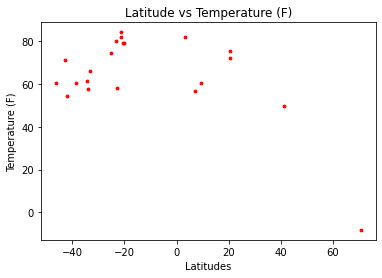

In [39]:
plt.scatter(cityweather2_df["Latitudes"], cityweather2_df["Temperature"], s=8, facecolor="red")
plt.xlabel("Latitudes")
plt.ylabel("Temperature (F)")
plt.title("Latitude vs Temperature (F)")
plt.savefig("Latitude and Temperature.png", facecolor="white")
plt.show()

#### Latitude vs. Humidity Plot

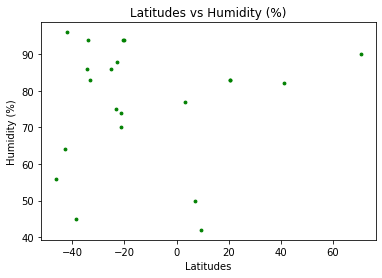

In [40]:
plt.scatter(cityweather2_df["Latitudes"], cityweather2_df["Humidity"], s=8, facecolor="green")
plt.xlabel("Latitudes")
plt.ylabel("Humidity (%)")
plt.title("Latitudes vs Humidity (%)")
plt.savefig("Latitude and Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

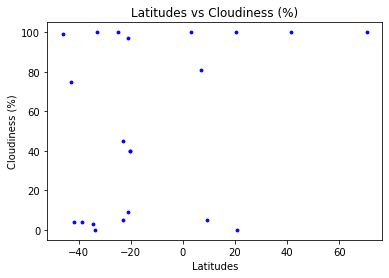

In [41]:
plt.scatter(cityweather2_df["Latitudes"], cityweather2_df["Cloudiness"], s=8, facecolor="blue")
plt.xlabel("Latitudes")
plt.ylabel("Cloudiness (%)")
plt.title("Latitudes vs Cloudiness (%)")
plt.savefig("Latitude and Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

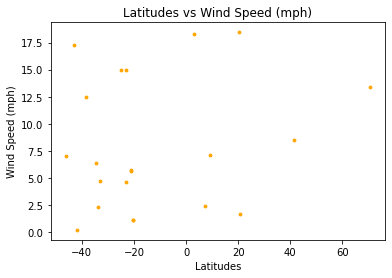

In [42]:
plt.scatter(cityweather2_df["Latitudes"], cityweather2_df["Wind Speed"], s=8, facecolor="orange")
plt.xlabel("Latitudes")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitudes vs Wind Speed (mph)")
plt.savefig("Latitude and Wind.png")
plt.show()